In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("advertaising_sales_project")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# EDA

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [6]:
data.shape

(200, 5)

In [7]:
df=data.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<AxesSubplot:>

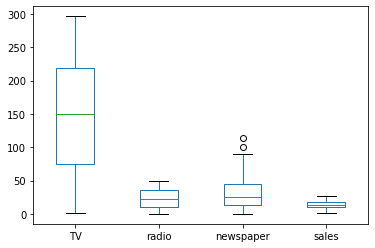

In [10]:
df.plot.box()

<AxesSubplot:>

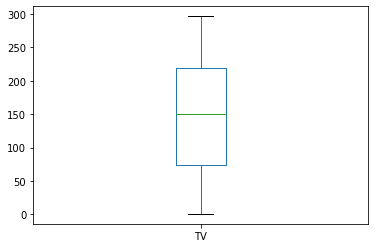

In [11]:
df['TV'].plot.box()

<AxesSubplot:>

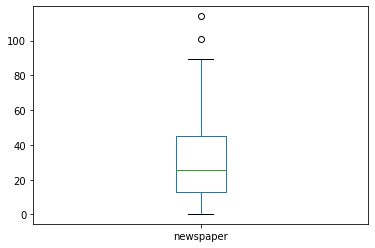

In [12]:
df['newspaper'].plot.box()

In [13]:
df.shape

(200, 4)

In [14]:
from scipy.stats import zscore
z_scr=zscore(df)
df_new=df.loc[(abs(z_scr)<3).all(axis=1)]
print(df_new.shape)

(198, 4)


In [15]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [16]:
from sklearn.preprocessing import power_transform
transform_data=power_transform(df_new)
df_new=pd.DataFrame(transform_data,columns=df_new.columns)

In [17]:
df_new.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
sales       -0.007573
dtype: float64

# splitting x and y

In [21]:
x=df_new.drop(columns=["sales"])
y=df_new[["sales"]]

In [24]:
#applying power tranform to standardise x
from sklearn.preprocessing import StandardScaler
transform_data=power_transform(df_new)
df_new=pd.DataFrame(transform_data,columns=df_new.columns)


In [26]:
x.head()

,TV,radio,newspaper
0,0.955983,0.969110,1.604196
1,-1.192003,1.046234,0.831044
2,-1.646125,1.372968,1.607052
3,0.142934,1.147332,1.283768
4,0.456452,-0.735026,1.280622


In [27]:
#checking the max r2 score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        #print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

# Selecting the models along with tuning

In [28]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

max r2 score corresponding to  90  is  0.9533015548093516


In [29]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(cross_val_score(lreg,x,y,cv=5,scoring="r2"))

Mean r2 score for Linear Regression:  0.8985582344321447
standard deviation in r2 score for Linear Regression:  0.04437160092522141
[0.91643336 0.92718714 0.92252817 0.81018363 0.91645887]


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
clf = GridSearchCV(knr, neighbors, cv=10)
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 2}

In [31]:

knr=KNeighborsRegressor(n_neighbors=5)
r_state=maxr2_score(knr,x,y)

max r2 score corresponding to  97  is  0.9725297111098262


In [32]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
print(cross_val_score(knr,x,y,cv=5,scoring="r2"))

Mean r2 score for KNN Regression:  0.9260235348252112
standard deviation in r2 score for KNN Regression:  0.052817418816591834
[0.94694968 0.95959502 0.96638606 0.82266899 0.93451793]


In [33]:
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [34]:
svr=SVR(kernel="rbf",C=10)
r_state=maxr2_score(svr,x,y)

max r2 score corresponding to  63  is  0.9918059936195986


In [40]:
#cross_val_score
from sklearn.model_selection import cross_val_score
print("Mean r2 score for SVM Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for SVM Regression: ",cross_val_score(svr,x,y,cv=5,scoring="r2").std())
print(cross_val_score(svr,x,y,cv=5,scoring="r2"))

Mean r2 score for SVM Regression:  0.9779121895111647
standard deviation in r2 score for SVM Regression:  0.01785527943457088
[0.98743485 0.98902104 0.98562305 0.94230663 0.98517537]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 63,test_size=0.20)
svr=SVR(kernel="rbf",C=10)
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [37]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.08408222031667104
r2_score is:  0.9918059936195986


# saving the model

In [39]:
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svr, 'sales_channel_svm.pkl')

['sales_channel_svm.pkl']